In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv("titanic_train.csv")

In [3]:
#Data exploration and analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#The training-set has 891 examples and 11 features plus the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Above we can see that 38% out of the training-set survived the Titanic. 
#We can also see that the passenger ages range from 0.4 to 80. 
#On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [7]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [8]:
#From the table above, we can note a few things. 
#First of all, that we need to convert a lot of features into numeric ones later on, 
#so that the machine learning algorithms can process them. 
#Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. 
#We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with

In [9]:
total = df.isnull().sum().sort_values(ascending=False)

In [10]:
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [11]:
percent_1 = df.isnull().sum()/df.isnull().count()*100

In [12]:
percent_1

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

In [14]:
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

In [15]:
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [16]:
#The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [17]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [18]:
#It would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate
#Age and Sex

Text(0.5, 1.0, 'Male')

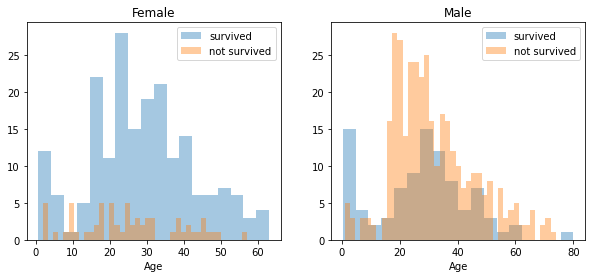

In [20]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [21]:
#You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40

In [22]:
#Embarked pclass and sex

C:\Users\sarmi\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


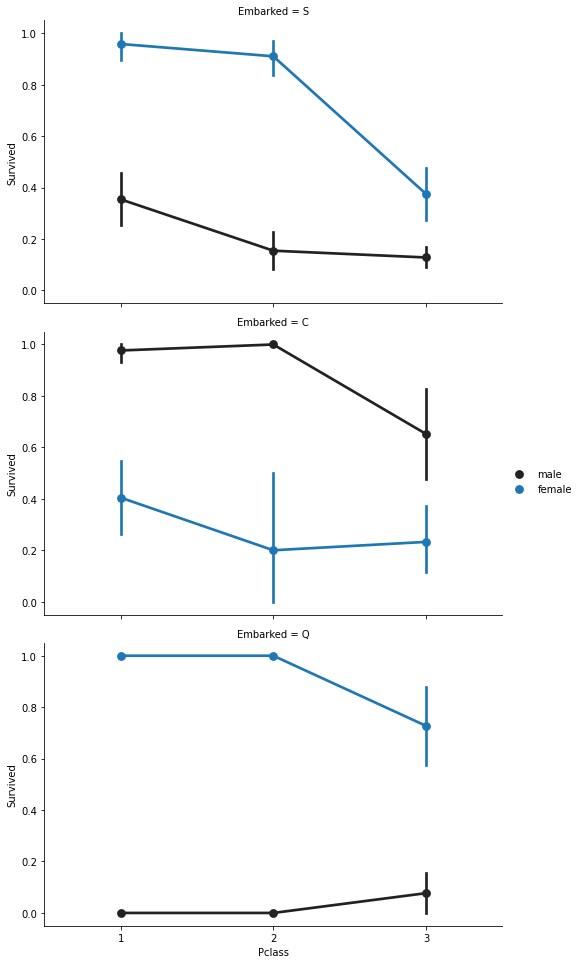

In [23]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [25]:
#Embarked seems to be correlated with survival, depending on the gender.
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

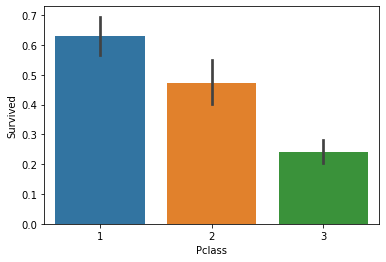

In [26]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [27]:
#Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.

C:\Users\sarmi\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


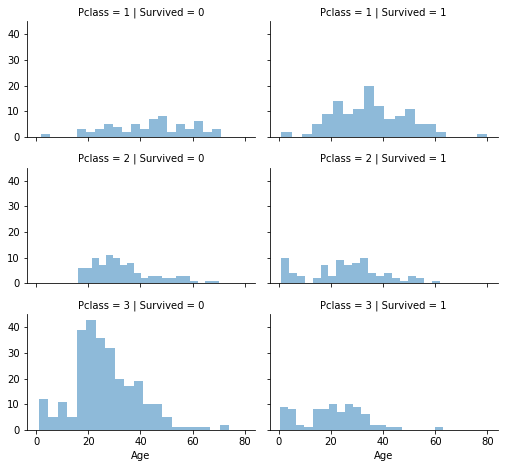

In [28]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [29]:
#The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [30]:
#SibSp and Parch:

In [31]:
#SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone

In [32]:
data = [df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [33]:
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\sarmi\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


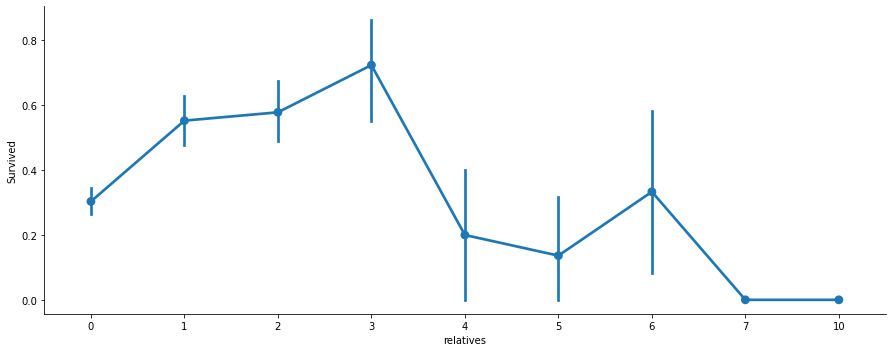

In [34]:
axes = sns.factorplot('relatives','Survived', 
                      data=df, aspect = 2.5, )

In [35]:
#Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

In [36]:
#Data Preprocessing
#First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

In [ ]:
df = df.drop(['PassengerId'], axis=1)

In [38]:
#Missing data treatment

In [39]:
total = df.isnull().sum().sort_values(ascending=False)

In [40]:
total

Cabin          687
Age            177
Embarked         2
not_alone        0
relatives        0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [41]:
#As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177)

In [43]:
#However lets deal with the features that contribute in survival

In [44]:
#We can drop the Cabin Feature

In [45]:
df = df.drop(['Cabin'], axis=1)

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


In [83]:
#Correlation
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.045075,-0.057527,-0.001652,-0.016162,-0.030467,-0.040143,0.057462,0.003878,0.013088,0.012294
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.078424,-0.035322,0.081629,0.312249,0.106811,0.016639,-0.203367,0.407753,-0.327274,0.188668
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.334592,0.083081,0.018443,-0.681035,0.045702,0.065997,0.135207,-0.173929,0.497828,-0.641545
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084923,0.114631,0.245489,0.245782,0.116569,0.200988,-0.303646,0.502713,-0.170309,0.020643
Age,0.045075,-0.078424,-0.334592,-0.084923,1.000000,-0.243916,-0.173717,0.087437,0.004162,-0.253494,0.172611,-0.088976,0.590270,0.283124
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243916,1.000000,0.414838,0.342377,-0.059961,0.890712,-0.584471,0.269623,-0.200172,-0.241858
Parch,-0.001652,0.081629,0.018443,0.245489,-0.173717,0.414838,1.000000,0.369094,-0.078665,0.783111,-0.583398,0.315784,-0.134220,-0.268087
Fare,-0.016162,0.312249,-0.681035,0.245782,0.087437,0.342377,0.369094,1.000000,-0.055693,0.418396,-0.526320,0.313595,-0.474412,0.591019
Embarked,-0.030467,0.106811,0.045702,0.116569,0.004162,-0.059961,-0.078665,-0.055693,1.000000,-0.080281,0.017807,0.045400,0.031104,-0.040828
relatives,-0.040143,0.016639,0.065997,0.200988,-0.253494,0.890712,0.783111,0.418396,-0.080281,1.000000,-0.690922,0.342039,-0.203865,-0.299234


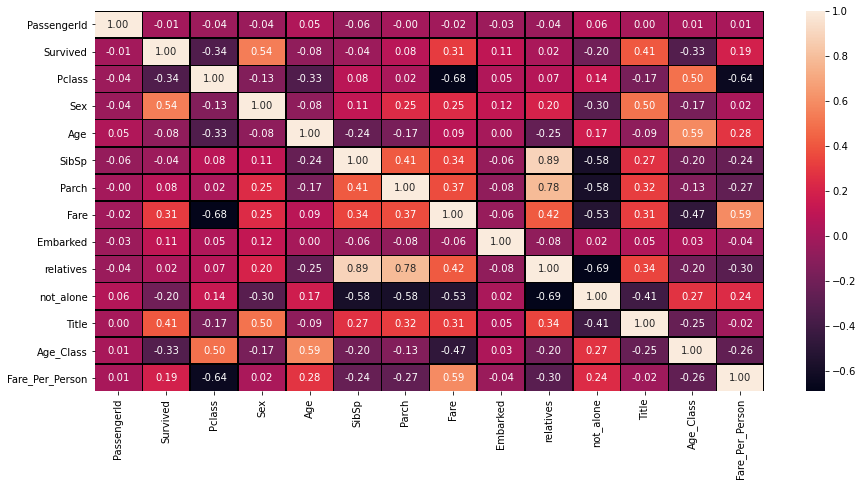

In [84]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=.5,linecolor="black",fmt='.2f')

In [47]:
data = [df]

for dataset in data:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [48]:
rand_age

array([31, 16, 38, 30, 18, 26, 20, 36, 23, 15, 35, 18, 19, 22, 27, 32, 43,
       28, 28, 33, 29, 22, 33, 42, 26, 38, 43, 21, 39, 34, 15, 21, 21, 31,
       33, 43, 15, 21, 26, 32, 16, 22, 27, 21, 16, 18, 43, 19, 42, 37, 27,
       43, 30, 22, 36, 20, 39, 27, 29, 19, 26, 21, 34, 21, 19, 32, 35, 19,
       35, 24, 31, 35, 36, 30, 15, 33, 18, 20, 36, 15, 35, 39, 19, 23, 34,
       39, 40, 30, 42, 40, 30, 26, 31, 25, 18, 29, 40, 27, 28, 23, 31, 28,
       39, 41, 24, 18, 42, 18, 27, 27, 34, 29, 40, 43, 33, 35, 24, 18, 37,
       20, 38, 16, 26, 39, 28, 15, 39, 38, 34, 24, 24, 38, 39, 43, 20, 25,
       16, 16, 23, 33, 21, 23, 43, 17, 35, 27, 29, 38, 24, 29, 31, 18, 19,
       41, 31, 37, 30, 31, 27, 15, 42, 23, 25, 42, 28, 42, 26, 25, 26, 39,
       27, 41, 36, 17, 39, 32, 29])

In [50]:
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [51]:
#Embarked:
#Since the Embarked feature has only 2 missing values, we will just fill these with the most common one

In [52]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [53]:
common_value = 'S'
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [54]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [55]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 83.7+ KB


In [57]:
#Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked

In [58]:
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [59]:
df['Fare']

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

In [60]:
#Convert to Numeric data and then drop it

In [61]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [62]:
df = df.drop(['Name'], axis=1)

In [63]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,1,0,1
1,2,1,1,female,38,1,0,PC 17599,71,C,1,0,3
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,2
3,4,1,1,female,35,1,0,113803,53,S,1,0,3
4,5,0,3,male,35,0,0,373450,8,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,211536,13,S,0,1,5
887,888,1,1,female,19,0,0,112053,30,S,0,1,2
888,889,0,3,female,29,1,2,W./C. 6607,23,S,3,0,2
889,890,1,1,male,26,0,0,111369,30,C,0,1,1


In [64]:
#Sex:
#Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [65]:
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [66]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [67]:
#Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [68]:
df = df.drop(['Ticket'], axis=1)

In [69]:
#Embarked:
#Convert ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [71]:
pd.qcut(df['Fare'], q=5)

0      (-0.001, 7.0]
1      (39.0, 512.0]
2      (-0.001, 7.0]
3      (39.0, 512.0]
4        (7.0, 10.0]
           ...      
886     (10.0, 21.0]
887     (21.0, 39.0]
888     (21.0, 39.0]
889     (21.0, 39.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.0] < (7.0, 10.0] < (10.0, 21.0] < (21.0, 39.0] < (39.0, 512.0]]

In [72]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,0,22,1,0,7,0,1,0,1
1,2,1,1,1,38,1,0,71,1,1,0,3
2,3,1,3,1,26,0,0,7,0,0,1,2
3,4,1,1,1,35,1,0,53,0,1,0,3
4,5,0,3,0,35,0,0,8,0,0,1,1
5,6,0,3,0,31,0,0,8,2,0,1,1
6,7,0,1,0,54,0,0,51,0,0,1,1
7,8,0,3,0,2,3,1,21,0,4,0,4
8,9,1,3,1,27,0,2,11,0,2,0,3
9,10,1,2,1,14,1,0,30,1,1,0,3


In [73]:
data = [df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [74]:
#Creating new Features
#I will add two new features to the dataset, that I compute out of other features.
# Age times Class

In [75]:
data = [df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [76]:
#Fare per person

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,1,0,3,0,22,1,0,0,0,1,0,1,66,0
1,2,1,1,1,38,1,0,3,1,1,0,3,38,1
2,3,1,3,1,26,0,0,0,0,0,1,2,78,0
3,4,1,1,1,35,1,0,3,0,1,0,3,35,1
4,5,0,3,0,35,0,0,1,0,0,1,1,105,1
5,6,0,3,0,31,0,0,1,2,0,1,1,93,1
6,7,0,1,0,54,0,0,3,0,0,1,1,54,3
7,8,0,3,0,2,3,1,2,0,4,0,4,6,0
8,9,1,3,1,27,0,2,1,0,2,0,3,81,0
9,10,1,2,1,14,1,0,2,1,1,0,3,28,1


In [77]:
#Building Models

In [78]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
#Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [87]:
#Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

C:\Users\sarmi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
#K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [89]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

In [90]:
#Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [91]:
#Looping to find the best Model
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,  
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
82.72,Logistic Regression
81.04,KNN
78.69,Naive Bayes


In [92]:
#As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [93]:
#K-fold cross validation

In [94]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.86666667 0.85       0.83333333 0.75       0.75
 0.79661017 0.79661017 0.84745763 0.88135593]
Mean: 0.8138700564971751
Standard Deviation: 0.0459748604918879


In [95]:
#This looks much more realistic than before. Our model has a average accuracy of 81% with a standard deviation of 4 %

In [96]:
#Peek at Feature importance

In [97]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PassengerId,0.168
Title,0.150
Age_Class,0.148
Sex,0.130
Age,0.120
Pclass,0.065
Fare,0.049
relatives,0.048
Embarked,0.035


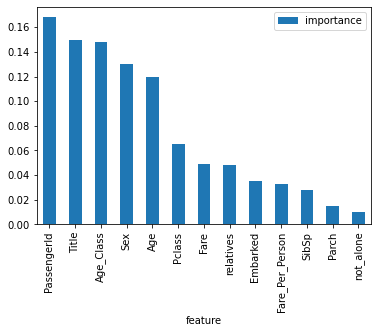

In [98]:
importances.plot.bar()

In [99]:
#Conclusion:
#not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. 
#Because of that I will drop them from the dataset and train the classifier again. 
#We could also remove more or less features, but this would need a more detailed investigation of the 
#features effect on our model. But I think it’s just fine to remove only Alone and Parch.
df  = df.drop("not_alone", axis=1)


df  = df.drop("Parch", axis=1)


In [104]:
#Training random forest again:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [101]:
#Hyperparameter Tuning

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, y_train)
clf.bestparams

In [105]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.38 %


In [106]:
#Further evaluation
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[338,  36],
       [ 78, 144]], dtype=int64)

In [107]:
#Precision and Recall:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8
Recall: 0.6486486486486487


In [108]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.7164179104477612

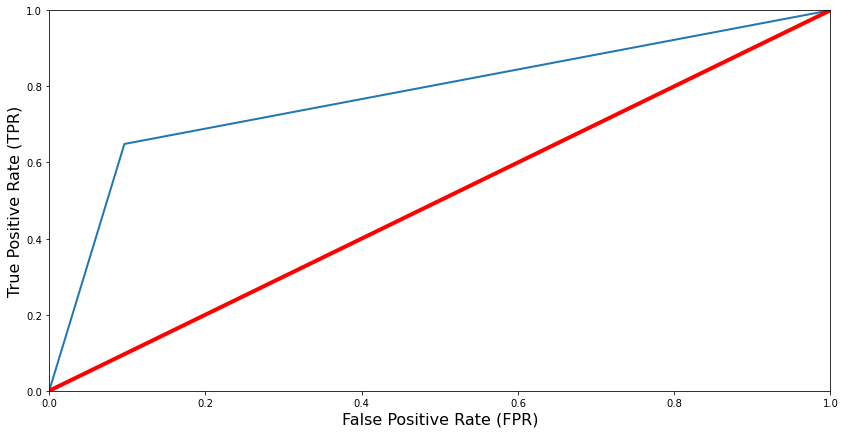

In [111]:
#ROC-AUC Curve

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, predictions)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [113]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, predictions)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7761959820783351


In [116]:
#Model Saving

import pickle
filename='titanic.pkl'
pickle.dump(random_forest,open(filename,'wb'))

In [115]:
#Conclusion
a=np.array(y_test)
predicted=np.array(random_forest.predict(X_test))
df_com=pd.DataFrame({"Original":a,"predicted":predicted},index=range(len(a)))
df_com

,Original,predicted
0,1,0
1,0,0
2,0,0
3,1,1
4,1,0
...,...,...
290,0,0
291,0,0
292,1,1
293,0,0
